# Upper Confidence Bound (UCB)

<img src="11.png">

We will optimize the advertising of SUV company in order to find the best ad between multiple ad designs that will convert the maximum customers to click on the ad

Please note this data set is a simulation because real time data will cost us alot

## Tasks

#### We want to find the ad with the highest conversion rate.

#### The ad in which the users click the most.

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
dataset = pd.read_csv("Ads_CTR_optimisation.csv")

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing UCB

**The ad that we show online had a fixed conversion rate because it will convert over time for the same rate of people**

In [7]:
import math ## for sqrt function
N = 10000 ## number of observations
d = 10 ## number of ads
ads_selected = []
numbers_of_selections = [0] * d ## will intialize a list with 10 zeros ---> N
sum_of_rewards = [0] * d  ## will intialize a list with 10 zeros ---> R
total_reward = 0
for n in range(0, N):
    ad = 0
    max_UCB = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0 : ## numbers_of_selections will be larger than zero by default else result will be infinity
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt((3/2) * (math.log(n + 1) / numbers_of_selections[i]))
            upper_bound = average_reward + delta_i
        else: ## we will select other ads in order not to make our number_of_selections = 0
            upper_bound = 1e400 ## we will set it to a very high value (infinity) in order to not make the number of selections not equal zero
        if upper_bound > max_UCB:
            max_UCB = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    ## now we have to add selected rewards by ad = i
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + reward

### Visualizing results

The histogram will plot for each of the ad when it was selected for number of times

X axis will have number of ads

y axis will have number of selections

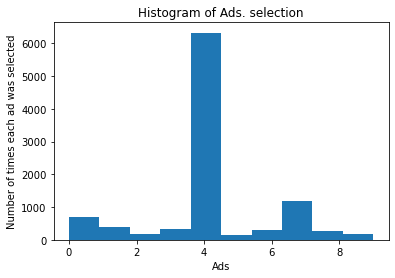

In [8]:
plt.hist(ads_selected)
plt.title("Histogram of Ads. selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()